In [9]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import importlib
from scripts import proj1_helpers, helpers
from scripts import implementation, feature_processing, k_fold, model_linear, model_logistic
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'
output_path = '../data/linear_processed_submission.csv'

In [ ]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [5]:
X_p = feature_processing.process_X(X)
X_t_p = feature_processing.process_X(X_t)

100%|██████████| 5/5 [00:18<00:00,  3.55s/it]


In [ ]:
#Linear
model = implementation.ridge_regression
loss = model_linear.compute_accuracy_loss

idx_min, rmse_all, lambdas = k_fold.cross_validation_select(X_p[:2000,:], y[:2000], model, loss, seed = 1,
                                                            k_fold = 2, N = 20, do_plot = True, do_tqdm = True)

100%|██████████| 500/500 [00:04<00:00, 104.88epoch/s, grad=11.1, loss=1.07e+03, w=6.46]


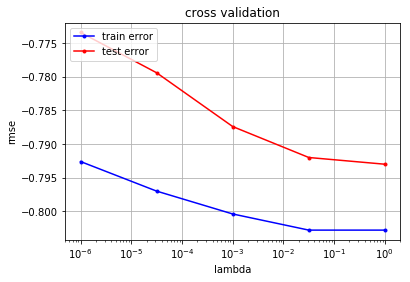

In [20]:
#Logistic
y_01 = helpers.y_to_01(np.array([y]).T)
w0 = np.random.randn(X_p.shape[1], 1)
model = implementation.reg_logistic_regression
model_args = {'initial_w': w0, 'max_iters': 500, 'gamma': 1e-4, 'debug': False}
#loss = model_logistic.reg_loss
loss = model_linear.compute_accuracy_loss

idx_min, rmse_all, lambdas = k_fold.cross_validation_select(X_p[:5000,:], y_01[:5000], model, loss, kw_model = model_args, seed = 1,
                                                            k_fold = 2, N = 5, do_plot = True, do_tqdm = False)

In [ ]:
lambda_ = lambdas[idx_min]
w, l = model(y, X_p, lambda_ = lambda_)

In [ ]:
y_pred = proj1_helpers.predict_labels(w, X_t_p)
proj1_helpers.create_csv_submission(ids_t, y_pred, output_path)